In [1]:
import numpy as np
import tensorflow as tf
from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.utility import Utility
from ts.model import ExtremeTime, ExtremeTime2
from ts.plot import Plot

In [2]:
n = 21500
trainN = 21000
seqLength = 500
numSeqPlot = 5

trainData, testData = Utility.trainTestSplit(
    StandardGenerator('long_term').generate(n),
    trainN
)

# Extreme Time Model 1

## Trial 1

In [3]:
model = ExtremeTime(
    forecastHorizon=1,
    memorySize=5,
    windowSize=10,
    encoderStateSize=10,
    lstmStateSize=10
)

begin iteration 0
Completed Iteration: 0 | time taken:  56.25 sec | Avg Iteration Loss: 1.256796253687219
begin iteration 1
Completed Iteration: 1 | time taken:  56.63 sec | Avg Iteration Loss: 1.1989253315387094
begin iteration 2
Completed Iteration: 2 | time taken:  56.48 sec | Avg Iteration Loss: 1.1944753123002656
begin iteration 3
Completed Iteration: 3 | time taken:  57.05 sec | Avg Iteration Loss: 1.1792729098389831
begin iteration 4
Completed Iteration: 4 | time taken:  54.96 sec | Avg Iteration Loss: 1.1694937147990179
begin iteration 5
Completed Iteration: 5 | time taken:  54.39 sec | Avg Iteration Loss: 1.1494705804992242
begin iteration 6
Completed Iteration: 6 | time taken:  55.75 sec | Avg Iteration Loss: 1.1316038998429978
begin iteration 7
Completed Iteration: 7 | time taken:  56.76 sec | Avg Iteration Loss: 1.131024849613332
begin iteration 8
Completed Iteration: 8 | time taken:  58.58 sec | Avg Iteration Loss: 1.1356159211151295
begin iteration 9
Completed Iteration: 

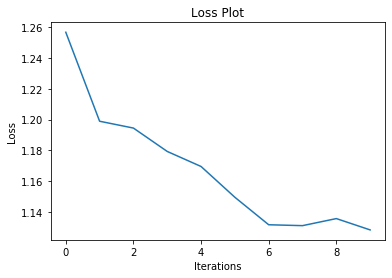

In [4]:
loss = model.train(
    targetSeries=trainData,
    sequenceLength=seqLength,
    numIterations=10,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.01,
            50,
            0.99
        )
    ),
    verboseLevel=1,
    returnLosses=True
)

Plot.plotLoss(loss)

Train Eval Loss: 1.171016279252765


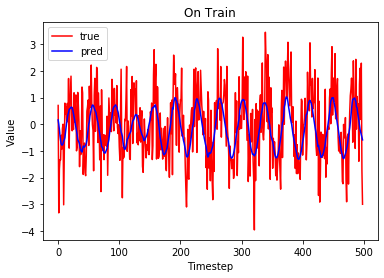

Train Eval Loss: 1.2258572646734973


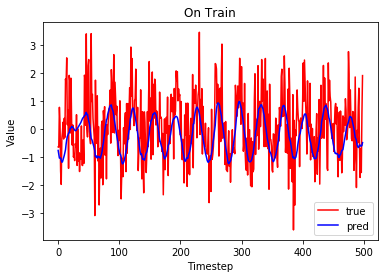

Train Eval Loss: 1.1946755736661434


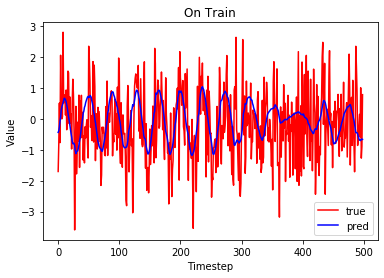

Train Eval Loss: 1.1856268308709133


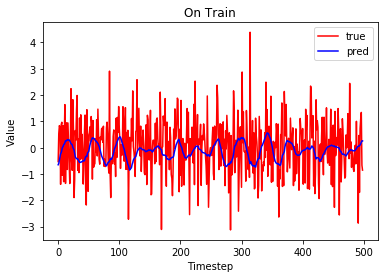

Train Eval Loss: 1.1661983620745153


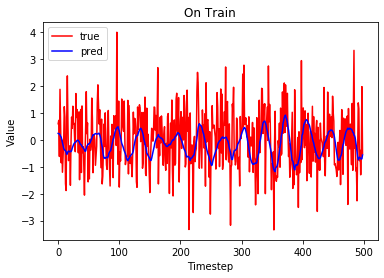

In [5]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, trainN - seqLength)
    seq = trainData[idx:idx + seqLength]
    evalLoss, Ypred = model.evaluate(seq, returnPred=True)
    Ytrue = seq[1:]

    print(f'Train Eval Loss: {evalLoss}')
    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

Test Eval Loss: 1.273456245076328


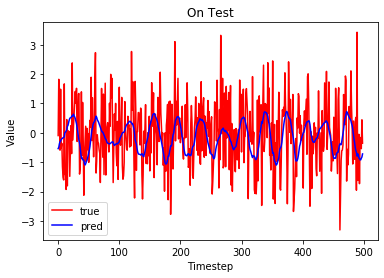

In [6]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

print(f'Test Eval Loss: {evalLoss}')
Plot.plotPredTrue(Ypred, Ytrue, 'On Test')

## Trial 2

In [7]:
model = ExtremeTime(
    forecastHorizon=1,
    memorySize=20,
    windowSize=10,
    encoderStateSize=10,
    lstmStateSize=10
)

begin iteration 0
Completed Iteration: 0 | time taken:  78.87 sec | Avg Iteration Loss: 1.2608935129458936
begin iteration 1
Completed Iteration: 1 | time taken:  72.43 sec | Avg Iteration Loss: 1.1905181570716719
begin iteration 2
Completed Iteration: 2 | time taken:  66.25 sec | Avg Iteration Loss: 1.1668369497313695
begin iteration 3
Completed Iteration: 3 | time taken:  67.62 sec | Avg Iteration Loss: 1.1606683137320344
begin iteration 4
Completed Iteration: 4 | time taken:  70.49 sec | Avg Iteration Loss: 1.162203224248708
begin iteration 5
Completed Iteration: 5 | time taken:  68.66 sec | Avg Iteration Loss: 1.1445429625916792
begin iteration 6
Completed Iteration: 6 | time taken:  67.73 sec | Avg Iteration Loss: 1.1379937237244424
begin iteration 7
Completed Iteration: 7 | time taken:  65.05 sec | Avg Iteration Loss: 1.1264130488519029
begin iteration 8
Completed Iteration: 8 | time taken:  65.66 sec | Avg Iteration Loss: 1.128991573218748
begin iteration 9
Completed Iteration: 

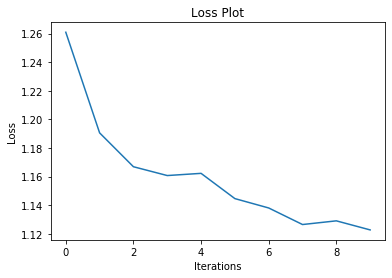

In [8]:
loss = model.train(
    targetSeries=trainData,
    sequenceLength=seqLength,
    numIterations=10,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.01,
            50,
            0.99
        )
    ),
    verboseLevel=1,
    returnLosses=True
)

Plot.plotLoss(loss)

Train Eval Loss: 1.193733959356592


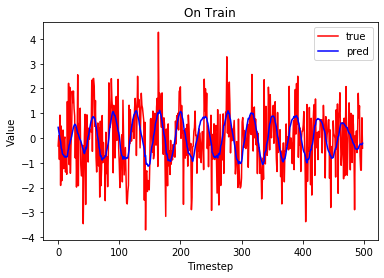

Train Eval Loss: 1.0744155792547347


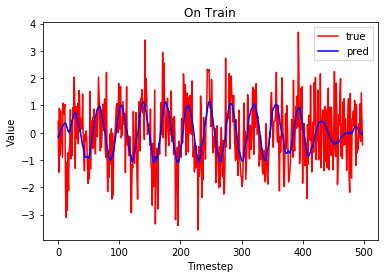

Train Eval Loss: 1.2756231508943139


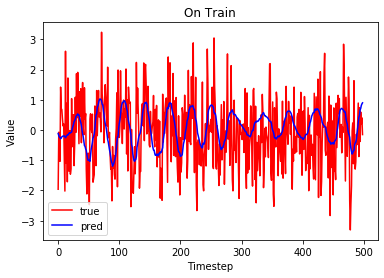

Train Eval Loss: 1.1712274351343215


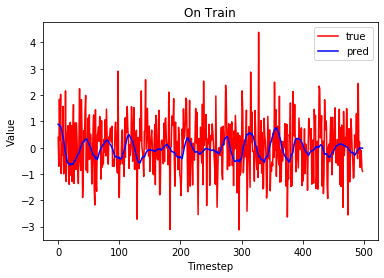

Train Eval Loss: 1.1545704629219926


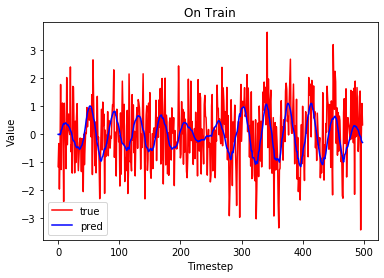

In [9]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, trainN - seqLength)
    seq = trainData[idx:idx + seqLength]
    evalLoss, Ypred = model.evaluate(seq, returnPred=True)
    Ytrue = seq[1:]

    print(f'Train Eval Loss: {evalLoss}')
    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

Test Eval Loss: 1.2382061344326967


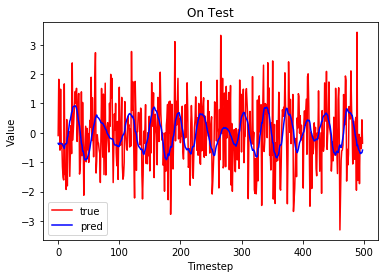

In [10]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

print(f'Test Eval Loss: {evalLoss}')
Plot.plotPredTrue(Ypred, Ytrue, 'On Test')

# Extreme Time Model 2

## Trial 1

In [11]:
model = ExtremeTime2(
    forecastHorizon=1,
    memorySize=5,
    windowSize=10,
    embeddingSize=10,
    contextSize=10
)

begin iteration 0
Completed Iteration: 0 | time taken:  59.30 sec | Avg Iteration Loss: 1.255983705679993
begin iteration 1
Completed Iteration: 1 | time taken:  58.30 sec | Avg Iteration Loss: 1.2458210454183336
begin iteration 2
Completed Iteration: 2 | time taken:  58.24 sec | Avg Iteration Loss: 1.1768087195877028
begin iteration 3
Completed Iteration: 3 | time taken:  56.28 sec | Avg Iteration Loss: 1.1488900726454456
begin iteration 4
Completed Iteration: 4 | time taken:  55.44 sec | Avg Iteration Loss: 1.143720299956708
begin iteration 5
Completed Iteration: 5 | time taken:  64.46 sec | Avg Iteration Loss: 1.1262839599480305
begin iteration 6
Completed Iteration: 6 | time taken:  64.44 sec | Avg Iteration Loss: 1.1249320907121825
begin iteration 7
Completed Iteration: 7 | time taken:  63.47 sec | Avg Iteration Loss: 1.1253911436218746
begin iteration 8
Completed Iteration: 8 | time taken:  60.88 sec | Avg Iteration Loss: 1.1166108542993376
begin iteration 9
Completed Iteration: 

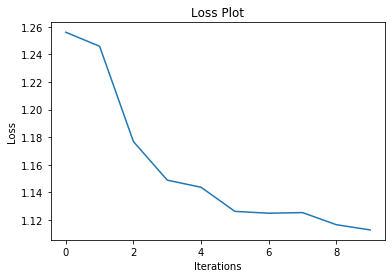

In [12]:
loss = model.train(
    targetSeries=trainData,
    sequenceLength=seqLength,
    numIterations=10,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.01,
            50,
            0.99
        )
    ),
    verboseLevel=1,
    returnLosses=True
)

Plot.plotLoss(loss)

Train Eval Loss: 1.20653072238037


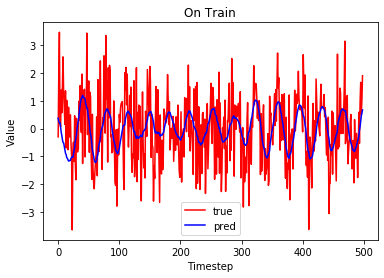

Train Eval Loss: 1.1676650012882965


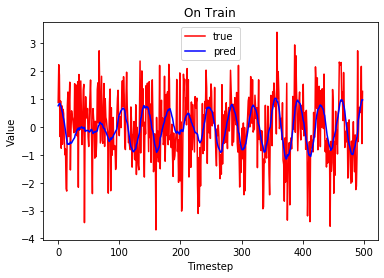

Train Eval Loss: 1.082858847097432


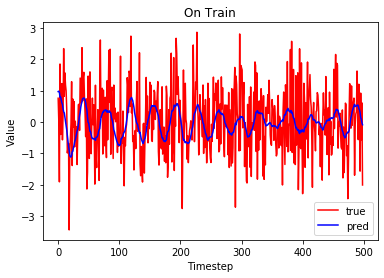

Train Eval Loss: 1.130633371157651


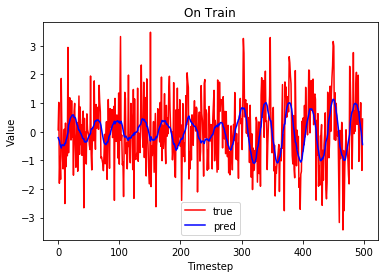

Train Eval Loss: 1.1450828774121418


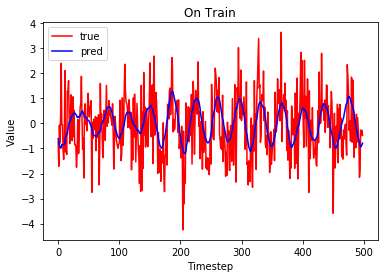

In [13]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, trainN - seqLength)
    seq = trainData[idx:idx + seqLength]
    evalLoss, Ypred = model.evaluate(seq, returnPred=True)
    Ytrue = seq[1:]

    print(f'Train Eval Loss: {evalLoss}')
    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

Test Eval Loss: 1.2513619073190276


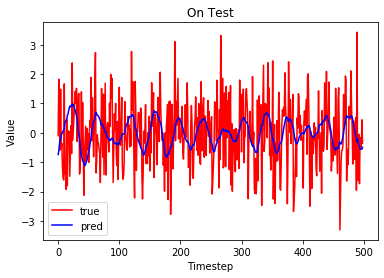

In [14]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

print(f'Test Eval Loss: {evalLoss}')
Plot.plotPredTrue(Ypred, Ytrue, 'On Test')

## Trial 2

In [15]:
model = ExtremeTime2(
    forecastHorizon=1,
    memorySize=20,
    windowSize=10,
    embeddingSize=10,
    contextSize=10
)

begin iteration 0
Completed Iteration: 0 | time taken:  74.48 sec | Avg Iteration Loss: 1.2556250430261657
begin iteration 1
Completed Iteration: 1 | time taken:  80.31 sec | Avg Iteration Loss: 1.2155350651741383
begin iteration 2
Completed Iteration: 2 | time taken:  79.24 sec | Avg Iteration Loss: 1.1704871908305332
begin iteration 3
Completed Iteration: 3 | time taken:  79.82 sec | Avg Iteration Loss: 1.1568833320897516
begin iteration 4
Completed Iteration: 4 | time taken:  72.42 sec | Avg Iteration Loss: 1.1392539728672577
begin iteration 5
Completed Iteration: 5 | time taken:  72.39 sec | Avg Iteration Loss: 1.132316270322745
begin iteration 6
Completed Iteration: 6 | time taken:  72.43 sec | Avg Iteration Loss: 1.1260401143030314
begin iteration 7
Completed Iteration: 7 | time taken:  72.20 sec | Avg Iteration Loss: 1.1287260416571456
begin iteration 8
Completed Iteration: 8 | time taken:  72.28 sec | Avg Iteration Loss: 1.11832854124116
begin iteration 9
Completed Iteration: 9

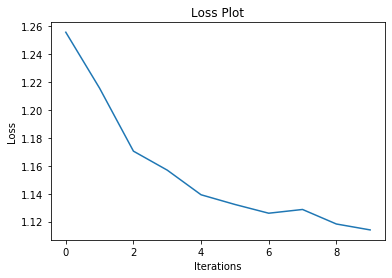

In [16]:
loss = model.train(
    targetSeries=trainData,
    sequenceLength=seqLength,
    numIterations=10,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.01,
            50,
            0.99
        )
    ),
    verboseLevel=1,
    returnLosses=True
)

Plot.plotLoss(loss)

Train Eval Loss: 1.1420711322753765


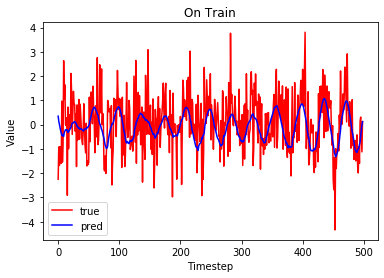

Train Eval Loss: 1.230911494121038


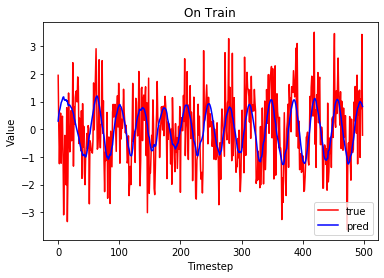

Train Eval Loss: 1.033011475558441


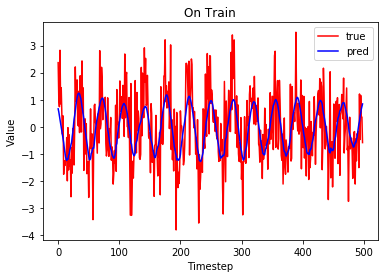

Train Eval Loss: 1.188725827335112


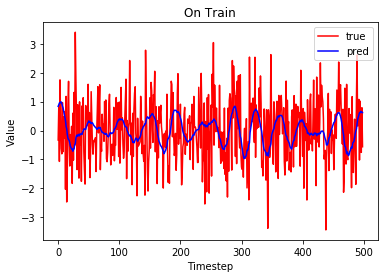

Train Eval Loss: 1.1225291302125666


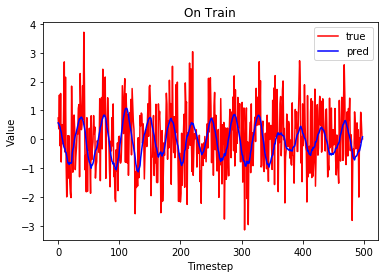

In [17]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, trainN - seqLength)
    seq = trainData[idx:idx + seqLength]
    evalLoss, Ypred = model.evaluate(seq, returnPred=True)
    Ytrue = seq[1:]

    print(f'Train Eval Loss: {evalLoss}')
    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

Test Eval Loss: 1.2201031321238682


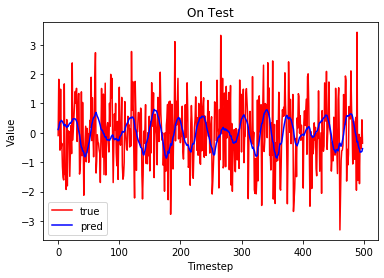

In [18]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

print(f'Test Eval Loss: {evalLoss}')
Plot.plotPredTrue(Ypred, Ytrue, 'On Test')